<a href="https://colab.research.google.com/github/johanjun/Google_Machine_Learning_Bootcamp_KR_2021/blob/main/kaggle/RSNA_MICCAI_BRAIN_TUMOR/1007_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 4.1 MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm import tqdm
import random
import pydicom
import cv2
import pickle

import matplotlib.pyplot as plt
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = '/content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai/'

In [ ]:
train_df = pd.read_csv(data_dir + "train_labels.csv")
test_df = pd.read_csv(data_dir + "sample_submission.csv")

In [ ]:
#refer: https://www.kaggle.com/arnabs007/part-1-rsna-miccai-btrc-understanding-the-data
EXCLUDE = [109, 123, 709]
train_df = train_df[~train_df.BraTS21ID.isin(EXCLUDE)]

In [ ]:
train_df.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [ ]:
train_df["imfolder"] = ['{0:05d}'.format(s) for s in train_df["BraTS21ID"]]
train_df

,BraTS21ID,MGMT_value,imfolder
0,0,1,00000
1,2,1,00002
2,3,0,00003
3,5,1,00005
4,6,1,00006
...,...,...,...
580,1005,1,01005
581,1007,1,01007
582,1008,1,01008
583,1009,0,01009


In [ ]:
train_path = data_dir + "train"

train_df["path"] = [os.path.join(train_path,s) for s in train_df["imfolder"]  ]
train_df.head()

,BraTS21ID,MGMT_value,imfolder,path
0,0,1,00000,/content/drive/MyDrive/Google_Machine_Learning...
1,2,1,00002,/content/drive/MyDrive/Google_Machine_Learning...
2,3,0,00003,/content/drive/MyDrive/Google_Machine_Learning...
3,5,1,00005,/content/drive/MyDrive/Google_Machine_Learning...
4,6,1,00006,/content/drive/MyDrive/Google_Machine_Learning...


In [ ]:
Scans = ["FLAIR","T1w","T1wCE","T2w"]

In [ ]:
for scan in Scans:
    train_df[scan +"_count"] = [ len(os.listdir(os.path.join(train_df["path"].iloc[s],scan))) for s in tqdm(range(len(train_df)))]

  0%|          | 2/582 [00:09<40:42,  4.21s/it]  

KeyboardInterrupt: ignored

In [ ]:
train_df.to_csv('train_df_count.csv')

In [ ]:
train_df = pd.read_csv(data_dir+'train_df_count.csv')

In [ ]:
train_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df.head()

,Unnamed: 0,BraTS21ID,MGMT_value,imfolder,path,FLAIR_count,T1w_count,T1wCE_count,T2w_count
0,0,0,1,0,/content/drive/MyDrive/Google_Machine_Learning...,400,33,129,408
1,1,2,1,2,/content/drive/MyDrive/Google_Machine_Learning...,129,31,129,384
2,2,3,0,3,/content/drive/MyDrive/Google_Machine_Learning...,129,33,129,408
3,3,5,1,5,/content/drive/MyDrive/Google_Machine_Learning...,400,28,129,424
4,4,6,1,6,/content/drive/MyDrive/Google_Machine_Learning...,129,32,129,408


In [ ]:
train_df_corr = train_df.corr()

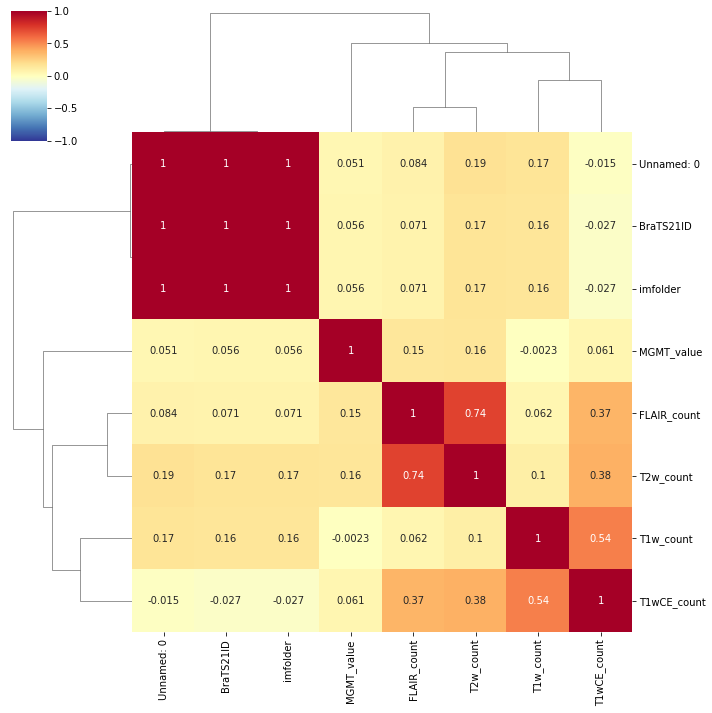

In [ ]:
import seaborn as sns
sns.clustermap(train_df_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [ ]:
train_df2 = train_df.copy()
for i, v in train_df.iterrows():
  # print(i)
  if train_df.iloc[i, :].FLAIR_count < 150 or train_df.iloc[i, :].T1w_count < 150 or train_df.iloc[i, :].T1wCE_count < 150 or train_df.iloc[i, :].T2w_count < 150 :
    train_df2.drop([i], inplace=True)

In [ ]:
train_df2.shape

(129, 9)

In [ ]:
cd /content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai/

/content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai


In [ ]:
train_df2.head()

,Unnamed: 0,BraTS21ID,MGMT_value,imfolder,path,FLAIR_count,T1w_count,T1wCE_count,T2w_count
316,318,468,1,468,/content/drive/MyDrive/Google_Machine_Learning...,256,178,240,188
319,321,472,1,472,/content/drive/MyDrive/Google_Machine_Learning...,216,206,206,408
321,323,478,1,478,/content/drive/MyDrive/Google_Machine_Learning...,196,214,214,376
322,324,479,1,479,/content/drive/MyDrive/Google_Machine_Learning...,216,156,256,256
323,325,480,1,480,/content/drive/MyDrive/Google_Machine_Learning...,196,296,296,192


In [ ]:
del train_df2['Unnamed: 0']

In [ ]:
del train_df2['imfolder']

In [ ]:
del train_df2['path']

In [ ]:
del train_df2['FLAIR_count']
del train_df2['T1w_count']
del train_df2['T1wCE_count']
del train_df2['T2w_count']

In [ ]:
train_df2.head()

,BraTS21ID,MGMT_value
316,468,1
319,472,1
321,478,1
322,479,1
323,480,1


In [ ]:
train_df2.reset_index(drop=True, inplace=True)

In [ ]:
train_df2.tail()

,BraTS21ID,MGMT_value
124,768,1
125,772,1
126,773,1
127,774,0
128,775,1


In [ ]:
pwd

'/content/drive/My Drive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai'

In [ ]:
train_df2.to_csv('train_df(over150).csv')

In [ ]:
train_df2.MGMT_value.value_counts()

1    80
0    49
Name: MGMT_value, dtype: int64

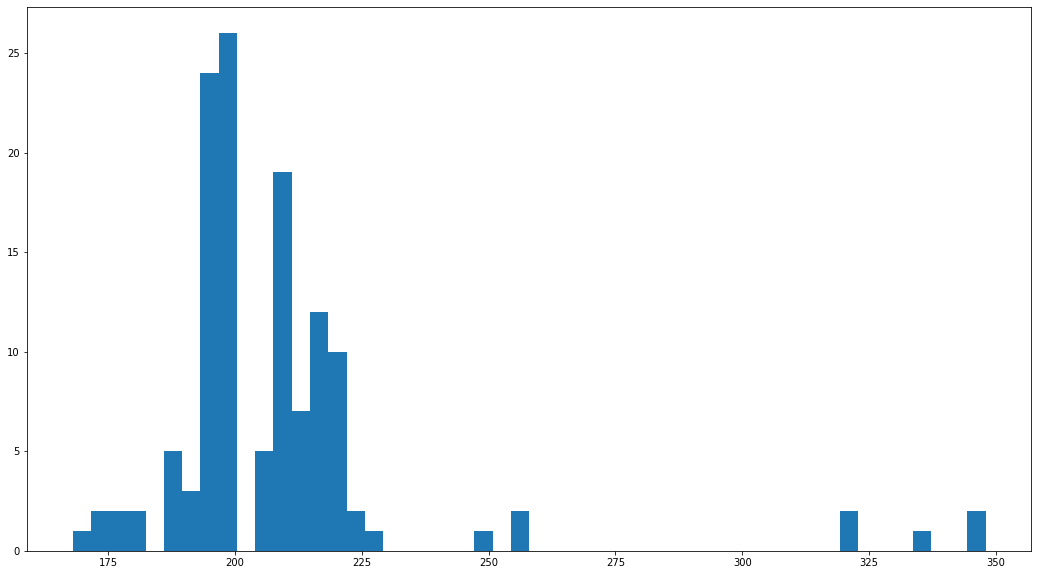

In [ ]:
plt.figure(figsize=(18,10))
plt.hist(train_df2.FLAIR_count, bins=50)
plt.show()

In [ ]:
train_df2.iloc[:, -4:].head()

,FLAIR_count,T1w_count,T1wCE_count,T2w_count
316,256,178,240,188
319,216,206,206,408
321,196,214,214,376
322,216,156,256,256
323,196,296,296,192


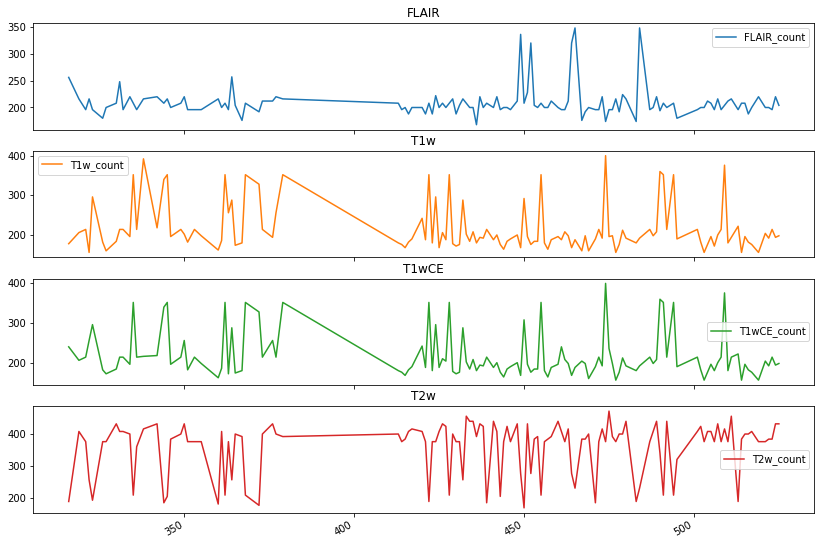

<Figure size 1296x720 with 0 Axes>

In [ ]:
graph1, graph2, graph3, graph4 = train_df2.iloc[:, -4:].plot(subplots=True, figsize=(14,10))
plt.figure(figsize=(18,10))
graph1.set_title("FLAIR")
graph2.set_title("T1w")
graph3.set_title("T1wCE")
graph4.set_title("T2w")
plt.show()

In [ ]:
train_df.describe()

,BraTS21ID,MGMT_value,FLAIR_count,T1w_count,T1wCE_count,T2w_count
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,431.785223,0.525773,127.164948,132.522337,165.580756,171.432990
std,251.249415,0.499765,101.333673,91.388893,81.362322,156.753097
min,0.000000,0.000000,15.000000,19.000000,19.000000,19.000000
25%,220.250000,0.000000,60.000000,32.000000,129.000000,64.000000
50%,424.000000,1.000000,60.000000,180.000000,192.000000,64.000000
75%,629.500000,1.000000,200.000000,192.000000,192.000000,376.000000
max,1010.000000,1.000000,514.000000,400.000000,400.000000,472.000000


In [ ]:
allsame = [train_df["FLAIR_count"].iloc[s] ==   train_df["T1w_count"].iloc[s] ==train_df["T1wCE_count"].iloc[s] ==train_df["T2w_count"].iloc[s] 
          for s in range(len(train_df))]

In [ ]:
train_df['allsame'] = allsame
train_df.head()

,BraTS21ID,MGMT_value,imfolder,path,FLAIR_count,T1w_count,T1wCE_count,T2w_count,allsame
0,0,1,00000,/content/drive/MyDrive/Google_Machine_Learning...,400,33,129,408,False
1,2,1,00002,/content/drive/MyDrive/Google_Machine_Learning...,129,31,129,384,False
2,3,0,00003,/content/drive/MyDrive/Google_Machine_Learning...,129,33,129,408,False
3,5,1,00005,/content/drive/MyDrive/Google_Machine_Learning...,400,28,129,424,False
4,6,1,00006,/content/drive/MyDrive/Google_Machine_Learning...,129,32,129,408,False


In [ ]:
train_df_allsame = train_df[train_df['allsame']]

In [ ]:
TYPES = ["FLAIR", "T1w", "T1wCE", "T2w"] 

In [ ]:
def load_dicom(path, size = 64): #load DICOM files
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array #returns a numpy.ndarray containing the pixel data
    if np.max(data) != 0:
        data = data / np.max(data) #standardizes so that the pixel values are between 0 and 1
    data = (data * 255).astype(np.uint8) #rescales to 0 and 255
    return cv2.resize(data, (size, size))

In [ ]:
def get_all_image_paths(BraTS21ID, image_type, folder="train"): #get an array of all the images of a particular type or a particular patient id
    assert(image_type in TYPES) #only in types
    patient_path = os.path.join(data_dir + "%s/" % folder, str(BraTS21ID).zfill(5)) #다른 폴더일 수도 있음
    #print(lambda x: int(x[:-4].split("-")[-1]))
    
    paths = sorted(glob.glob(os.path.join(patient_path, image_type, "*")), key=lambda x: int(x[:-4].split("-")[-1])) #sort
    #print(paths)
    
    num_images = len(paths)
    
    start = int(num_images * 0.25)
    end = int(num_images * 0.75)
    if num_images < 10:
        jump = 1
    else:
        jump = 3
        
    return np.array(paths[start:end:jump])

In [ ]:
def get_all_images(BraTS21ID, image_type, folder="train", size=225):
    return [load_dicom(path, size) for path in get_all_image_paths(BraTS21ID, image_type, folder)]

In [ ]:
def get_all_data_train(image_type):
    global train_df_allsame
    
    X = []
    y = []
    train_ids = []

    for i in tqdm(train_df_allsame.index):
        tmp_x = train_df_allsame.loc[i]
        images = get_all_images(int(tmp_x["BraTS21ID"]), image_type, "train", IMAGE_SIZE)
        label = tmp_x["MGMT_value"]

        X += images
        y += [label] * len(images)
        train_ids += [int(tmp_x["BraTS21ID"])] * len(images)
        assert(len(X) == len(y))
    return np.array(X), np.array(y), np.array(train_ids)

def get_all_data_test(image_type):
    global test_df
    
    X = []
    test_ids = []

    for i in tqdm(test_df.index):
        tmp_x = test_df.loc[i]
        images = get_all_images(int(tmp_x["BraTS21ID"]), image_type, "test", IMAGE_SIZE)
        X += images
        test_ids += [int(tmp_x["BraTS21ID"])] * len(images)

    return np.array(X), np.array(test_ids)

In [ ]:
IMAGE_SIZE = 64

X_T1wCE, y_T1wCE, train_idt_T1wCE = get_all_data_train("T1wCE")
X_test_T1wCE, test_idt_T1wCE = get_all_data_test("T1wCE")

X_T2w, y_T2w, train_idt_T2w = get_all_data_train("T2w")
X_test_T2w, test_idt_T2w = get_all_data_test("T2w")

X_T1w, y_T1w, train_idt_T1w = get_all_data_train("T1w")
X_test_T1w, test_idt_T1w = get_all_data_test("T1w")

X_FLAIR, y_FLAIR, train_idt_FLAIR = get_all_data_train("FLAIR")
X_test_FLAIR, test_idt_FLAIR = get_all_data_test("FLAIR")


100%|██████████| 62/62 [03:20<00:00,  3.23s/it]

100%|██████████| 87/87 [34:11<00:00, 23.58s/it]

100%|██████████| 62/62 [03:33<00:00,  3.44s/it]

100%|██████████| 87/87 [32:28<00:00, 22.39s/it]

100%|██████████| 62/62 [03:12<00:00,  3.10s/it]

100%|██████████| 87/87 [25:16<00:00, 17.43s/it]

100%|██████████| 62/62 [03:06<00:00,  3.01s/it]

100%|██████████| 87/87 [24:30<00:00, 16.90s/it]


In [ ]:
cd /content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai/

/content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai


In [ ]:
#pickling
with open('X_T1wCE_allsame.pkl', 'wb') as f:
  pickle.dump(X_T1wCE, f)

with open('y_T1wCE_allsame.pkl', 'wb') as f:
  pickle.dump(y_T1wCE, f)

with open('train_idt_T1wCE_allsame.pkl', 'wb') as f:
  pickle.dump(train_idt_T1wCE, f)

with open('X_test_T1wCE_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_T1wCE, f)

with open('test_idt_T1wCE_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_T1wCE, f)

In [ ]:
#pickling
with open('X_FLAIR_allsame.pkl', 'wb') as f:
  pickle.dump(X_FLAIR, f)

with open('y_FLAIR_allsame.pkl', 'wb') as f:
  pickle.dump(y_FLAIR, f)

with open('train_idt_FLAIR_allsame.pkl', 'wb') as f:
  pickle.dump(train_idt_FLAIR, f)

with open('X_test_FLAIR_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_FLAIR, f)

with open('test_idt_FLAIR_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_FLAIR, f)

In [ ]:
#pickling
with open('X_T2w_allsame.pkl', 'wb') as f:
  pickle.dump(X_T2w, f)

with open('y_T2w_allsame.pkl', 'wb') as f:
  pickle.dump(y_T2w, f)

with open('train_idt_T2w_allsame.pkl', 'wb') as f:
  pickle.dump(train_idt_T2w, f)

with open('X_test_T2w_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_T2w, f)

with open('test_idt_T2w_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_T2w, f)

In [ ]:
#pickling
with open('X_T1w_allsame.pkl', 'wb') as f:
  pickle.dump(X_T1w, f)

with open('y_T1w_allsame.pkl', 'wb') as f:
  pickle.dump(y_T1w, f)

with open('train_idt_T1w_allsame.pkl', 'wb') as f:
  pickle.dump(train_idt_T1w, f)

with open('X_test_T1w_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_T1w, f)

with open('test_idt_T1w_allsame.pkl', 'wb') as f:
  pickle.dump(X_test_T1w, f)